In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models.widgets import Dropdown
from bokeh.io import curdoc
from bokeh.layouts import column

from bokeh.models import BooleanFilter, CDSView, Select, Range1d, HoverTool
from bokeh.palettes import Category20
from bokeh.models.formatters import NumeralTickFormatter

from bokeh.io import show
import matplotlib.dates as mdate

#file_name_before = 'Bitcoin_before_trading_clean'
file_name_after = 'Binance_after_trading_clean'

#Read data in
def get_df (name):
    df = pd.DataFrame(pd.read_csv(name +'.csv'))
    return df


In [3]:
#df_before_trading = get_df(file_name_before)
df_after_trading = get_df(file_name_after)

# Visualizing the data using Bokeh package

In [4]:
# Define constants
W_PLOT = 1500
H_PLOT = 600
TOOLS = 'pan,box_zoom,lasso_select,wheel_zoom,reset'

#Color in the color map
VBAR_WIDTH = 0.2
RED = Category20[7][6]
GREEN = Category20[5][4]

BLUE = Category20[3][0]
BLUE_LIGHT = Category20[3][1]

ORANGE = Category20[3][2]
PURPLE = Category20[9][8]
BROWN = Category20[11][10]

In [21]:
#Plot basic stock prices using bokeh package
def plot_stock_prices(stock):
    p = figure(plot_width=W_PLOT, plot_height=H_PLOT, tools=TOOLS,
               title="Stock price", toolbar_location='below')
    
    #prepare some boolean parameter
    inc = stock.data['Close'] > stock.data['Open']
    dec = stock.data['Open'] > stock.data['Close']
    view_inc = CDSView(source=stock, filters=[BooleanFilter(inc)])
    view_dec = CDSView(source=stock, filters=[BooleanFilter(dec)])
    
    #Draw the line of view_ic and view_dec 
    p.segment(x0='index', x1='index', y0='Low', y1='High', color=GREEN, source=stock, view=view_inc)
    p.segment(x0='index', x1='index', y0='Low', y1='High', color=RED, source=stock, view=view_dec)
    
    #Set up the vertical bar
    p.vbar(x='index', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=BLUE, line_color=BLUE,
           source=stock,view=view_inc, name="price")
    p.vbar(x='index', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=RED, line_color=RED,
           source=stock,view=view_dec, name="price")
    
    #Adjusting label
    p.xaxis.major_label_overrides = {
         i+int(stock.data['index'][0]): date.strftime('%Y %b %d') for i, date in enumerate(pd.to_datetime(stock.data["Date"]))
    }

    p.xaxis.bounds = (stock.data['index'][0], stock.data['index'][-1])

    #Add ticks on the x-axis in the plot
    p.x_range.range_padding = 0.05
    p.xaxis.ticker.desired_num_ticks = 100 #Adding more might make the graph messy 
    p.xaxis.major_label_orientation = 3.14/4
    
    #Set up currency ticks on the y-axis
    p.yaxis.formatter = NumeralTickFormatter(format = '$ 0,0[.]000')

    
    #Set up hover tool bar
    p.add_tools(HoverTool(
        tooltips= [
            ('Date', '@Date{%F}'),
            ("Open", "@Open{$0,0.00}"),
            ("Close", "@Close{$0,0.00}"),
            ("Volume", "@Volume{($ 0.00 a)}")
        ],
        
        formatters = {
            '@Date' : 'datetime', 
        },
         
        mode = 'vline'
    ))
    
    #Set up the border and the background of the legend
#     p.legend.location = "top_left"
#     p.legend.border_line_alpha = 0
#     p.legend.background_fill_alpha = 0
#     p.legend.click_policy = "mute"
    
    return p

In [ ]:
#Bokeh plot
stock = ColumnDataSource(data = dict(Date = [], High = [], Low = [], Open = [], Close = [], Volumn = [], Marketcap = [], index = []))
stock.data = stock.from_df(df_before_trading)
elements = list()



#Update the plot
p_stock = plot_stock_prices(stock)
elements.append(p_stock)

curdoc().add_root(column(elements))
curdoc().title = 'Bokeh stocks historical prices'

show(p_stock)

# Moving average plot

In [64]:
#Moving average plot
def plot_moving_average(df_name):
    df_name.index = df_name['Date'] 
    plt.figure(figsize=(12,6))
    df_name['Close'].rolling(window = 30).mean().plot(label = '30 day average')
    df_name['Close'].plot(label = 'original')
    plt.title('Moving Average')
    plt.legend()

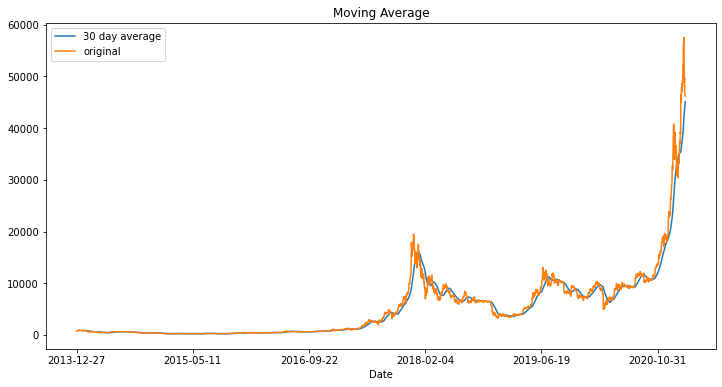

In [65]:
plot_moving_average(df_after_trading)